<a href="https://colab.research.google.com/github/lauraAriasFdez/TensorFlowSpecialization/blob/main/Improving_accuracy_using_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

More about the math behind Convolution Neural Network here: https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF

1. Deep Neural Netwokr (DNN)
2. Improving Computer Vision Accuracy using Convolutions & Pooling
3. Visualizing the Convolutions and Pooling




---



## **1. Deep Neural Network (DNN)**
In the previous lessons you saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy.


In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)



---



## **2. Improving Computer Vision Accuracy using Convolutions & Pooling**

### ***2.1 Convolution***

> In short, you take an ***kernel*** (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection.

> ***This is perfect for computer vision,  because you'll just train on the highlighted features by the kernel.***

---

### ***2.2 Pooling***
> Pooling is a way of compressing an image, in which you take 4 pixels near each other an only choose the pixel with highest value
---

### ***2.3 Thee concept of Convolutional Neural Networks***
Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.
1. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
2. https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D


In [1]:
import tensorflow as tf
print(tf.__version__)
## 1. Load the data
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## 2. Normalize data 
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

## 3. Make Model
model = tf.keras.models.Sequential([
                                    
  ## specify first convolution 
      # we want 64 filters  that are 3 by 3 
      # activation function is relu = throw away negative vlaues
      # 28 by 28 = input shape
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),

  # Compressed the image by taking a 2 by 2 set of pixels and only keep the highest
    # it will comrpessed the image by 1/4
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  ## Flat the image to start training 
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
## INSPECT MODEL Model 
  # see the journey/size of image thorugh the convolutions 
model.summary()

## 4. Train/Fit Model 
model.fit(training_images, training_labels, epochs=5)

## 5. Test Model 
test_loss = model.evaluate(test_images, test_labels)


2.7.0
4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                     

```
Layer(type)       Output Shape   
################################################   
conv2d (Conv2D)       (None, 26, 26, 64)                                       
 max_pooling2d        (None, 13, 13, 64)                                            

conv2d_1 (Conv2D)     (None, 11, 11, 64)                      
 max_pooling2d_1      (None, 5, 5, 64)                  

flatten (Flatten)     (None, 1600)                                   
 dense (Dense)        (None, 128)                       
 dense_1 (Dense)      (None, 10)                                                                                 
```

- Even though the date is 28 by 28 in the 1st layer the output is 26 by 26. The reson behind this is the filter is a 3 by 3 filters, meaning the boder cannot be calculated 
  - if the filter was 5 by 5, we would have 24 by 24 

- The pooling compressing the image by 1/4


- The last max pooling ends up creating 64 images of 5 by 5 in size, therefore instead of 1 single image of 28 by 28, we know have 64 images/img 5 by 5 = 1600





---



##**3. Visualizing the Convolutions and Pooling**

This code will show us the convolutions graphically. 

- The print (test_labels[:100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9).

In [2]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


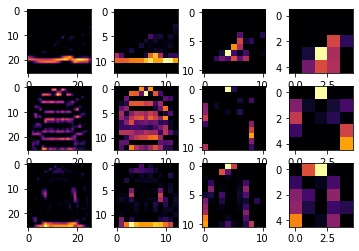

In [3]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)